In [1]:
# library
import pandas as pd
import numpy as np
import sqlite3
from tqdm import tqdm
from lib.sentistrength.sentistrength_id import *
import matplotlib.pyplot as plt

In [2]:
# make connection to sqlite db
conn = sqlite3.connect('product.db')
c = conn.cursor()

# enable foreign keys
c.execute("PRAGMA foreign_keys = ON")
conn.commit()

In [3]:
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

In [ ]:
review = pd.read_csv('./csvfiles/output_englishstem.csv', skip_blank_lines=False, low_memory=False)
review['text'] = review['text'].astype('str')

# wordcloud
from wordcloud import WordCloud
# WordCloud().generate expect string not pd.Series
from collections import Counter
semuatext = []
for i in range(len(review['text'])):
    for j in review.loc[i, 'text'].split():
        semuatext.append(j)
counts = Counter(semuatext)
wordcloud = WordCloud(background_color='white', max_words=200).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [131]:
pd.Series(counts).sort_values(ascending=False).head(20)

barang       269113
terima       229579
kasih        153529
sesuai       144611
cepat        141372
bagus        102280
juragan       90796
kirim         79515
mantap        66714
respon        61315
seller        54411
pesan         53857
pack          44698
nya           39914
deskripsi     35753
produk        33435
kualita       32219
oke           29618
fast          29086
banget        28530
dtype: int64

In [133]:
# kata dan frekuensi dalam bentuk dataframe
kataFrek = pd.DataFrame(pd.Series(counts))

In [137]:
kataFrek = kataFrek.reset_index()

In [138]:
kataFrek.columns = ['kata', 'frekuensi']

In [142]:
kataFrek = kataFrek.sort_values(by='frekuensi', ascending=False)

In [144]:
kataFrek.index = range(0, len(kataFrek))

In [185]:
kataFrek.set_index('kata').head(30).plot.bar(figsize=(7,5))

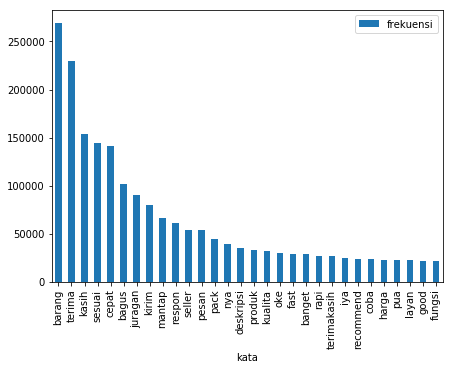

In [186]:
plt.show()

In [176]:
plt.clf()

In [25]:
import nltk
from nltk import unique_list
from nltk import ngrams

In [ ]:
#n = 2

#semuatext = []
#for i in range(len(review['text'])):
#    for j in review.loc[i, 'text']:
#        twograms = ngrams(j.split(), n)
#        semuatext.append(twograms)
#counts = Counter(semuatext)

In [28]:
x = ngrams(semuatext, 2)

In [29]:
fdist = nltk.FreqDist(x)

In [30]:
fdist.most_common(30)

[(('terima', 'kasih'), 146395),
 (('barang', 'terima'), 55534),
 (('barang', 'sesuai'), 55316),
 (('kirim', 'cepat'), 44222),
 (('sesuai', 'pesan'), 37297),
 (('barang', 'bagus'), 34471),
 (('sesuai', 'deskripsi'), 31972),
 (('kasih', 'juragan'), 28074),
 (('kasih', 'barang'), 27483),
 (('respon', 'cepat'), 25395),
 (('cepat', 'barang'), 23343),
 (('juragan', 'barang'), 21821),
 (('fast', 'respon'), 16313),
 (('recommend', 'seller'), 15648),
 (('sesuai', 'gambar'), 15567),
 (('pack', 'rapi'), 15453),
 (('bagus', 'sesuai'), 12818),
 (('terima', 'terima'), 11390),
 (('cepat', 'terima'), 10742),
 (('terima', 'sesuai'), 10138),
 (('recomend', 'seller'), 9615),
 (('barang', 'cepat'), 9358),
 (('juragan', 'terima'), 8935),
 (('pesan', 'terima'), 8836),
 (('produk', 'sesuai'), 8552),
 (('mantap', 'barang'), 8413),
 (('kasih', 'iya'), 8229),
 (('bagus', 'barang'), 8055),
 (('kasih', 'terima'), 8041),
 (('paket', 'terima'), 7922)]

In [31]:
y = ngrams(semuatext, 3)

In [32]:
fdist2 = nltk.FreqDist(y)

In [35]:
fdist2.most_common(50)

[(('terima', 'kasih', 'juragan'), 27728),
 (('terima', 'kasih', 'barang'), 26822),
 (('barang', 'sesuai', 'pesan'), 16260),
 (('barang', 'sesuai', 'deskripsi'), 12329),
 (('terima', 'terima', 'kasih'), 11032),
 (('cepat', 'terima', 'kasih'), 10023),
 (('kasih', 'juragan', 'barang'), 9681),
 (('kasih', 'barang', 'terima'), 8614),
 (('kirim', 'cepat', 'barang'), 8508),
 (('cepat', 'barang', 'sesuai'), 8152),
 (('terima', 'kasih', 'iya'), 8147),
 (('juragan', 'terima', 'kasih'), 7988),
 (('terima', 'kasih', 'terima'), 7882),
 (('barang', 'terima', 'terima'), 7346),
 (('barang', 'bagus', 'sesuai'), 6684),
 (('kasih', 'terima', 'kasih'), 6460),
 (('barang', 'terima', 'sesuai'), 6449),
 (('barang', 'terima', 'kasih'), 6180),
 (('respon', 'cepat', 'barang'), 6081),
 (('barang', 'sesuai', 'gambar'), 6045),
 (('juragan', 'barang', 'terima'), 5660),
 (('pesan', 'terima', 'kasih'), 5459),
 (('biar', 'bintang', 'bicara'), 5366),
 (('sesuai', 'pesan', 'terima'), 5066),
 (('bagus', 'terima', 'kasih'

In [125]:
pd.Series(counts).sort_values(ascending=False).head(200).to_csv("./csvfiles/200.csv")

In [3]:
# make connection to sqlite db
conn2 = sqlite3.connect('validasi.db')
c2 = conn2.cursor()

# enable foreign keys
c2.execute("PRAGMA foreign_keys = ON")
conn2.commit()

In [4]:
import tseriesRoutines as routines
import matplotlib.pyplot as plt
from scipy.stats.mstats import zscore

In [5]:
initial = routines.sqlToDf(conn2, c2)

In [6]:
#     def selectReviewVal(self, mongoid, impute=False, rating=0, ovsentiment=0, notAll=True):
notts = initial.selectReviewVal('5b322e9cb8a9f70142f6a767', impute=False, notAll=False)

In [7]:
product = routines.tsSalesRateSentiment(notts, freq='daily')

In [8]:
product[product.index >= '2018-06-16'].apply(zscore).head()

,Sales,rating,ovsentiment
date,,,
2018-06-16,-0.256074,0.843119,1.210551
2018-06-17,-0.896258,-1.223349,-0.977191
2018-06-18,-0.896258,-1.223349,-0.977191
2018-06-19,-0.896258,-1.223349,-0.977191
2018-06-20,0.384111,0.843119,1.210551


In [9]:
product[product.index >= '2018-04-1'].apply(zscore).plot()

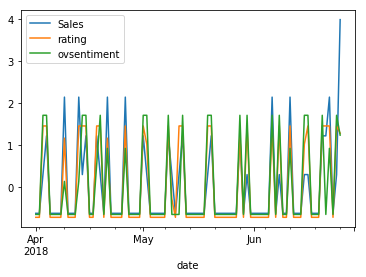

In [10]:
plt.show()

In [11]:
product = routines.tsSalesRateSentiment(notts, freq='monthly')

In [13]:
product['Sales'].plot()

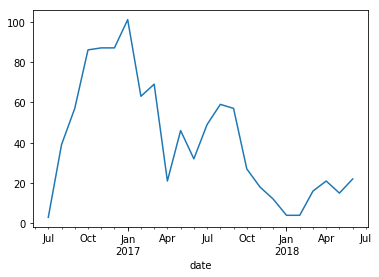

In [14]:
plt.show()

## prediction intervals - neural network

In [1]:
import tseriesRoutines as routines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import ceil, sqrt
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta
from keras import regularizers
from keras.constraints import max_norm, non_neg, unit_norm, min_max_norm
from keras.wrappers.scikit_learn import KerasRegressor


##########################################################################################
# RESULT REPRODUCIBILITY                                                                 #
##########################################################################################
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926
import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(42)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(42)
##########################################################################################

Using TensorFlow backend.


In [2]:
# make connection to sqlite db
conn = sqlite3.connect('product.db')
c = conn.cursor()

# enable foreign keys
c.execute("PRAGMA foreign_keys = ON")
conn.commit()

In [3]:
# import tseriesNN.py
import tseriesNN as tnn

In [4]:
product = tnn.genData('5aa2ad7735d6d34b0032a795', conn, c, impute=False, freq='daily')
X_train, y_train, X_test, y_test, dftrain, scaler = tnn.splitDataNN(product, percent=0.2, n_in=1, n_out=1)

In [5]:
X_train.shape

(383, 1, 3)

In [6]:
from keras.models import load_model
model = load_model('./training/lag1/MN/forecast_nn_5aa2ad7735d6d34b0032a795_MN_lstmmodel_lag1.h5')

In [7]:
from keras import backend as K
import tensorflow as tf

In [164]:
#model.get_weights()

In [135]:
outputTensor = model.output #Or model.layers[index].output

In [133]:
listOfVariableTensors = model.trainable_weights

In [161]:
listOfVariableTensors

[<tf.Variable 'lstm_1_1/kernel:0' shape=(3, 16) dtype=float32_ref>,
 <tf.Variable 'lstm_1_1/recurrent_kernel:0' shape=(4, 16) dtype=float32_ref>,
 <tf.Variable 'lstm_1_1/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_3_1/kernel:0' shape=(4, 1) dtype=float32_ref>,
 <tf.Variable 'dense_3_1/bias:0' shape=(1,) dtype=float32_ref>]

In [144]:
gradients = K.gradients(outputTensor, listOfVariableTensors)

In [139]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

/usr/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [146]:
g = sess.run(gradients,feed_dict={model.input:X_train})

In [8]:
from sklearn.utils import resample

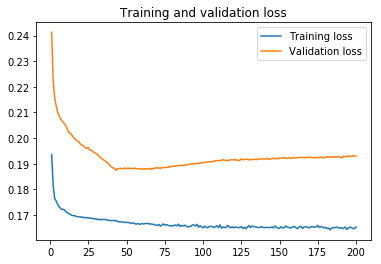

loss: 0.16663572704064472
val_loss: 0.19264548993979894
iterasi 0


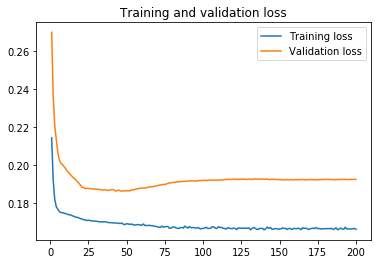

loss: 0.1686641906592849
val_loss: 0.19218726773435868
iterasi 1


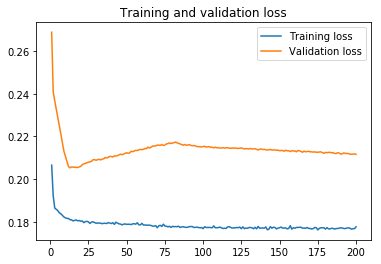

loss: 0.17841735666398903
val_loss: 0.21379181802583236
iterasi 2


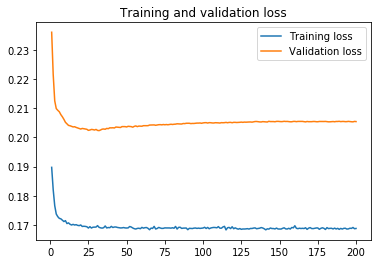

loss: 0.16933213629703922
val_loss: 0.20500834041585525
iterasi 3


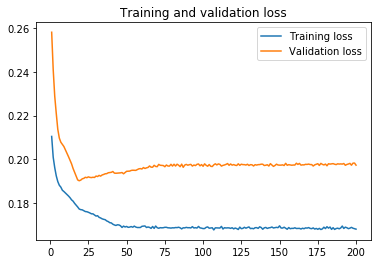

loss: 0.17091451109039255
val_loss: 0.1976136169893046
iterasi 4


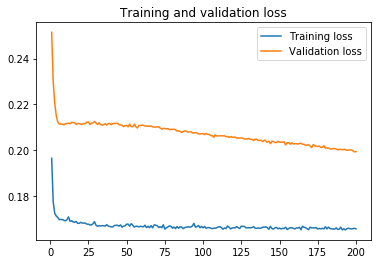

loss: 0.16683901861893602
val_loss: 0.2071957806746165
iterasi 5


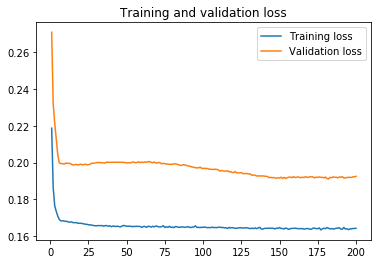

loss: 0.1654557657609487
val_loss: 0.1969335936040928
iterasi 6


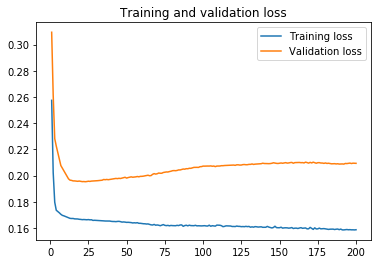

loss: 0.16313242265084085
val_loss: 0.20581572711157303
iterasi 7


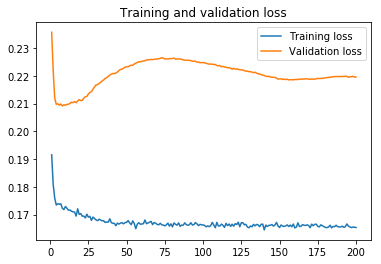

loss: 0.1671794677507278
val_loss: 0.2205910288604597
iterasi 8


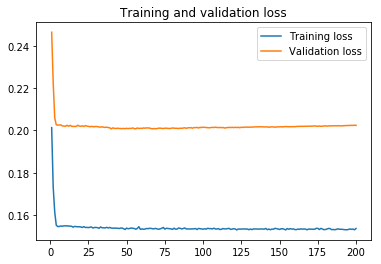

loss: 0.1540733065765458
val_loss: 0.2019397743915518
iterasi 9


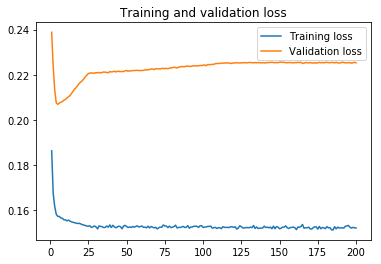

loss: 0.1528912701809842
val_loss: 0.2227620705962181
iterasi 10


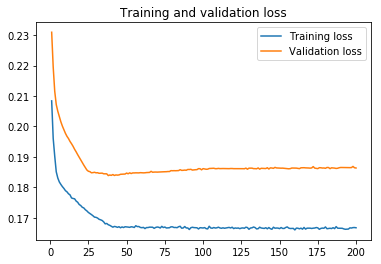

loss: 0.16847147752406857
val_loss: 0.18719383797297873
iterasi 11


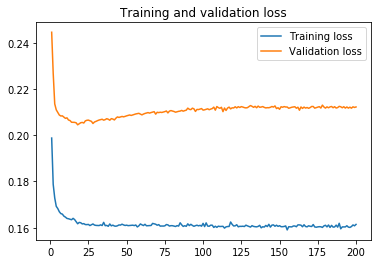

loss: 0.16151078632271634
val_loss: 0.21056375605985522
iterasi 12


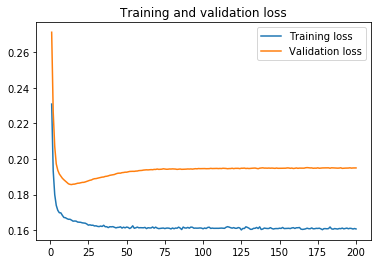

loss: 0.16238968834767298
val_loss: 0.1939172525300334
iterasi 13


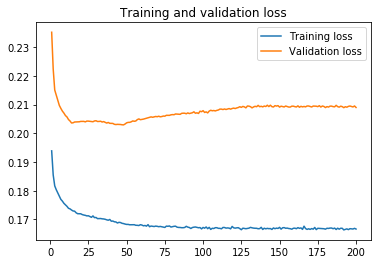

loss: 0.16847927813644353
val_loss: 0.20747413465442757
iterasi 14


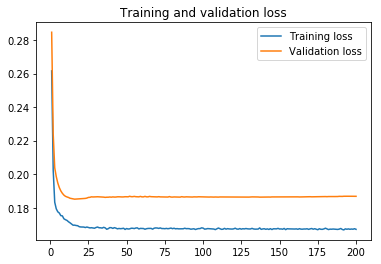

loss: 0.1686432119053314
val_loss: 0.18734341480458774
iterasi 15


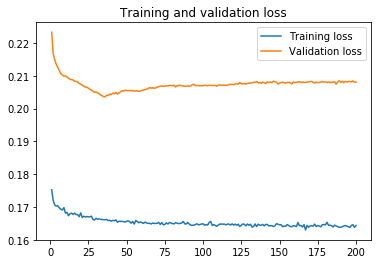

loss: 0.1653058949449433
val_loss: 0.2073949399528404
iterasi 16


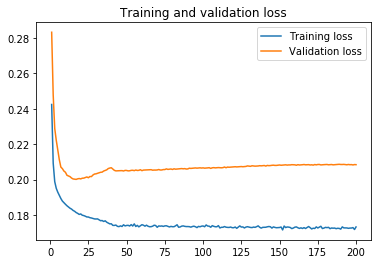

loss: 0.17539624655701938
val_loss: 0.20717720609158277
iterasi 17


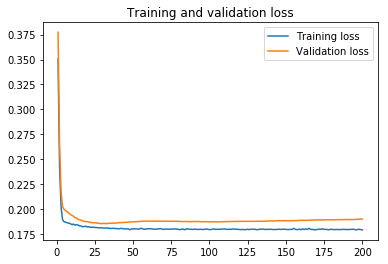

loss: 0.1814428190274198
val_loss: 0.18959797016965843
iterasi 18


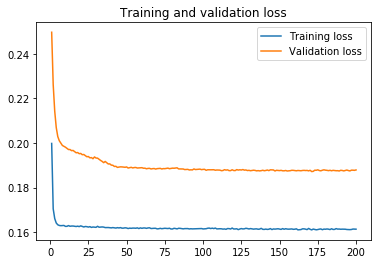

loss: 0.1619763800892833
val_loss: 0.19000942311249674
iterasi 19


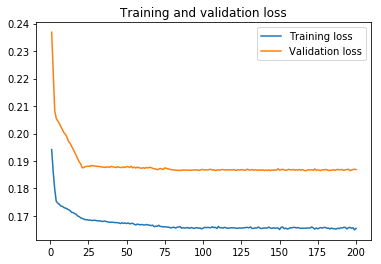

loss: 0.16701105961950577
val_loss: 0.1884452223777771
iterasi 20


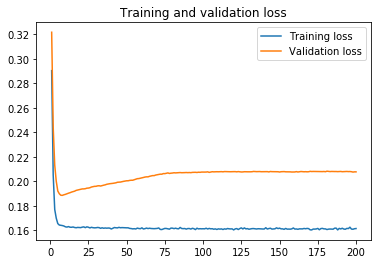

loss: 0.16250852388468406
val_loss: 0.20494271867287658
iterasi 21


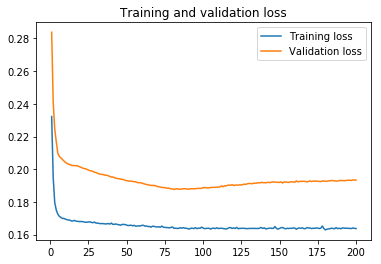

loss: 0.1655685609809607
val_loss: 0.19382889945370455
iterasi 22


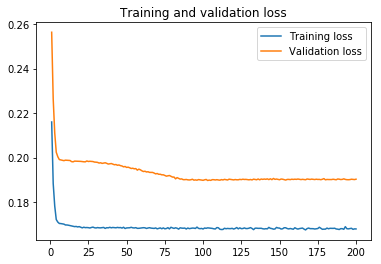

loss: 0.16866677477712655
val_loss: 0.19304731869138778
iterasi 23


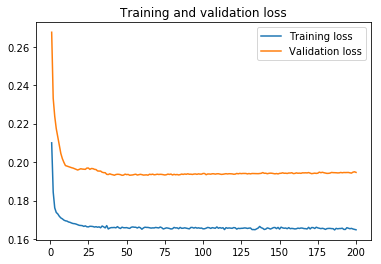

loss: 0.16636030579885522
val_loss: 0.19536270083238683
iterasi 24


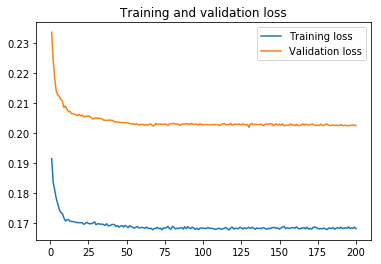

loss: 0.16913930599473162
val_loss: 0.20398247394710778
iterasi 25


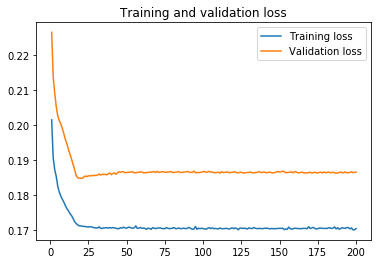

loss: 0.17137327907427014
val_loss: 0.1874833827248464
iterasi 26


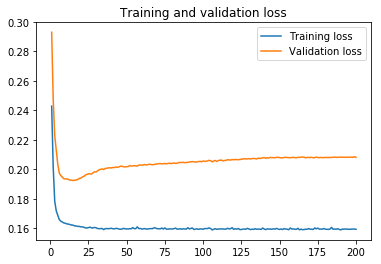

loss: 0.16075122786836588
val_loss: 0.2050961224641651
iterasi 27


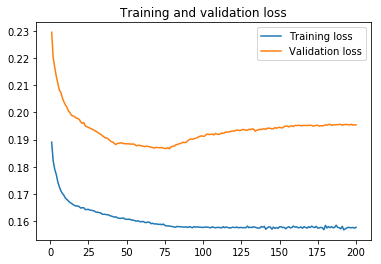

loss: 0.16000232336434778
val_loss: 0.19341157828457653
iterasi 28


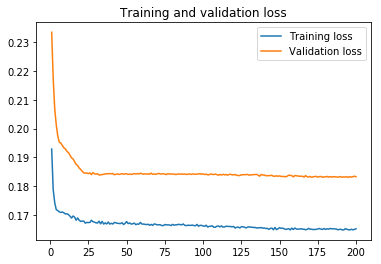

loss: 0.16661358436905138
val_loss: 0.18506795172579588
iterasi 29


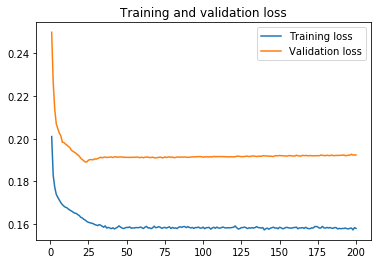

loss: 0.1596761265384427
val_loss: 0.19261541424008705
iterasi 30


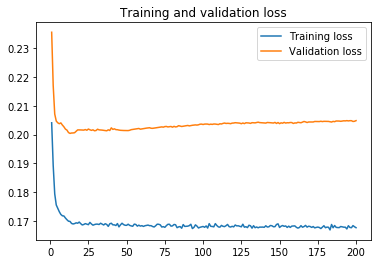

loss: 0.16883839062626615
val_loss: 0.20347334590119623
iterasi 31


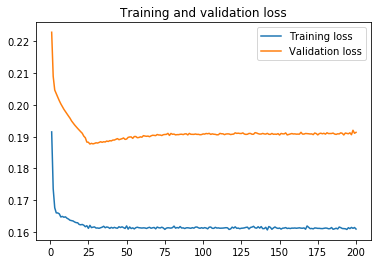

loss: 0.16181425474010233
val_loss: 0.1912962812588861
iterasi 32


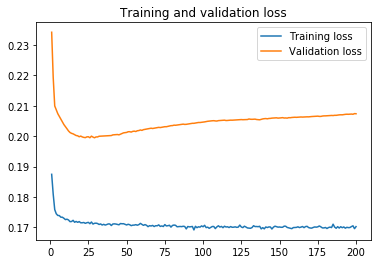

loss: 0.1707530051475639
val_loss: 0.20436053003494942
iterasi 33


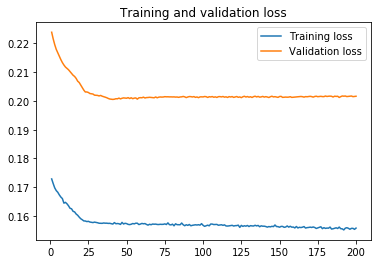

loss: 0.15754371781884535
val_loss: 0.20255058156947292
iterasi 34


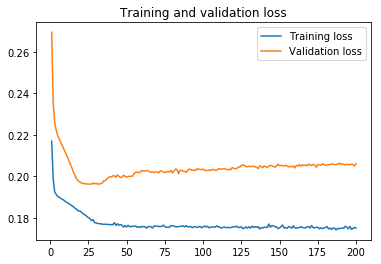

loss: 0.17720998299689888
val_loss: 0.20405264120548963
iterasi 35


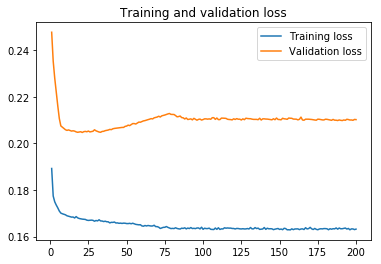

loss: 0.16477615224591435
val_loss: 0.20986384717126685
iterasi 36


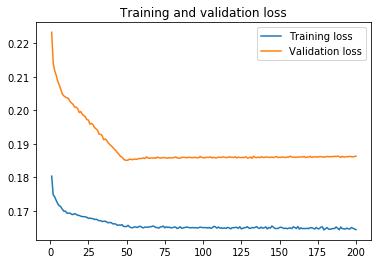

loss: 0.1658002412015713
val_loss: 0.18876599576324224
iterasi 37


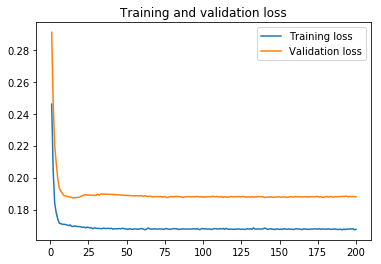

loss: 0.1687944827861014
val_loss: 0.18939571551978587
iterasi 38


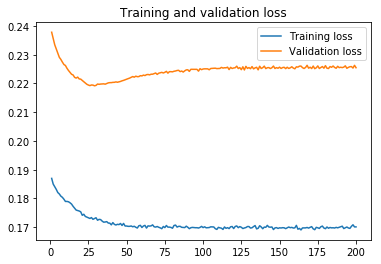

loss: 0.1712312172982579
val_loss: 0.22438660187025863
iterasi 39


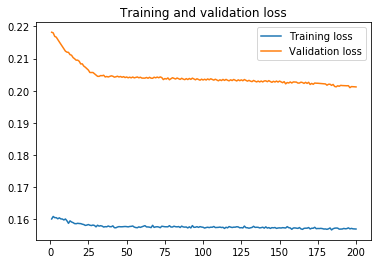

loss: 0.15767572835574106
val_loss: 0.20429987678304315
iterasi 40


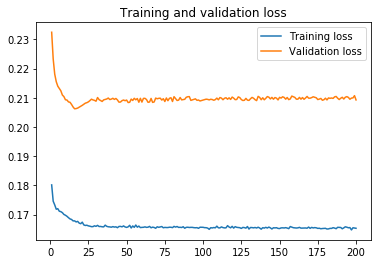

loss: 0.1660662281567683
val_loss: 0.2097820971533656
iterasi 41


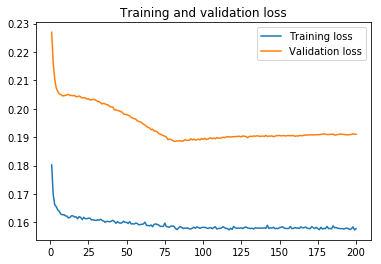

loss: 0.1591947435280284
val_loss: 0.19400575367733836
iterasi 42


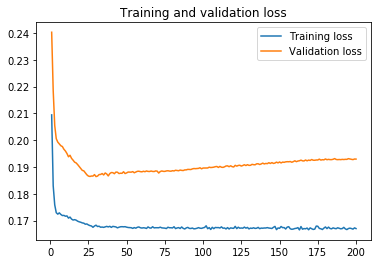

loss: 0.16799546768922874
val_loss: 0.19092101664592825
iterasi 43


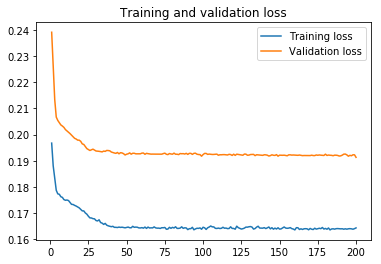

loss: 0.16581231719967435
val_loss: 0.1937810784888764
iterasi 44


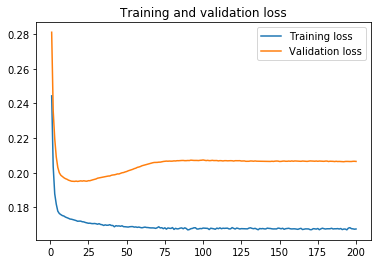

loss: 0.169345494061903
val_loss: 0.2048744459853818
iterasi 45


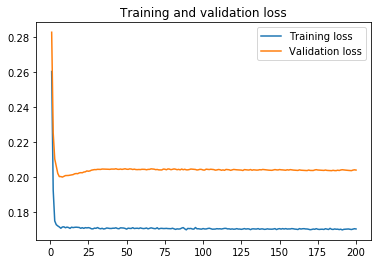

loss: 0.1710153015232195
val_loss: 0.20433545085291066
iterasi 46


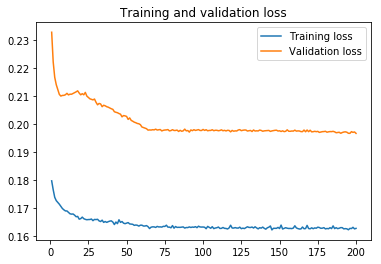

loss: 0.16407591477639527
val_loss: 0.20060481790453197
iterasi 47


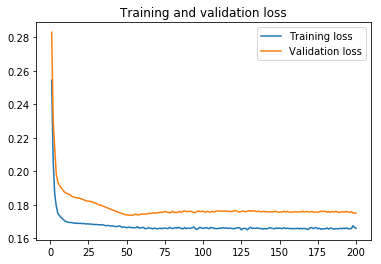

loss: 0.1674010893883422
val_loss: 0.1781481002581616
iterasi 48


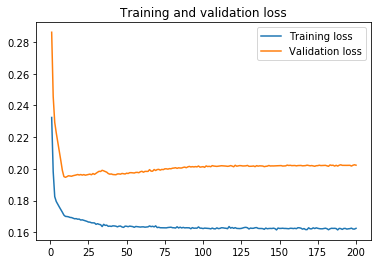

loss: 0.16433090884131488
val_loss: 0.20128064817748964
iterasi 49


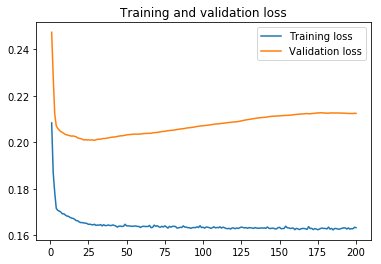

loss: 0.16428052222934933
val_loss: 0.20765394047523536
iterasi 50


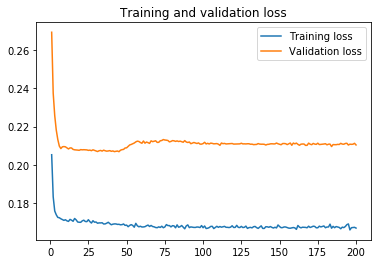

loss: 0.1687017734993648
val_loss: 0.21102245614243048
iterasi 51


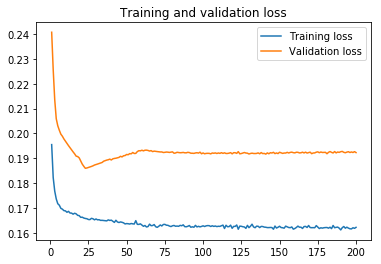

loss: 0.1638663194626181
val_loss: 0.19258018634902932
iterasi 52


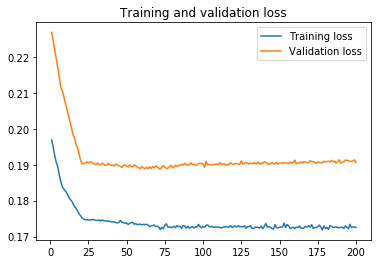

loss: 0.17408567554392795
val_loss: 0.19190680135662358
iterasi 53


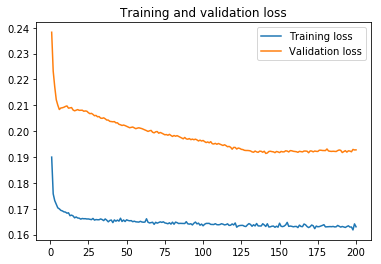

loss: 0.16471333649797323
val_loss: 0.1980098654081424
iterasi 54


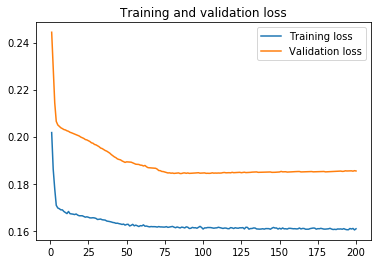

loss: 0.1626358606281153
val_loss: 0.18871904070799553
iterasi 55


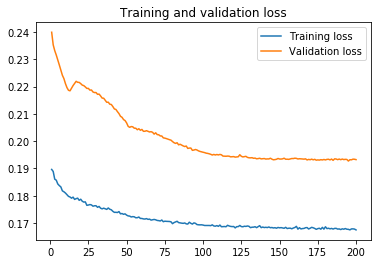

loss: 0.1713508744125422
val_loss: 0.20178661970732115
iterasi 56


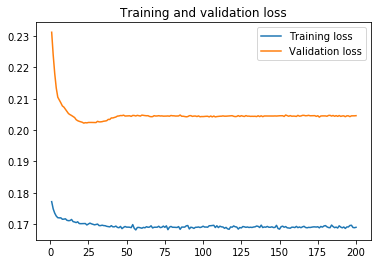

loss: 0.16937080333228213
val_loss: 0.2047469143010676
iterasi 57


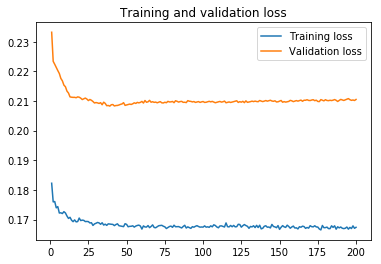

loss: 0.16818048782821735
val_loss: 0.21039513774526614
iterasi 58


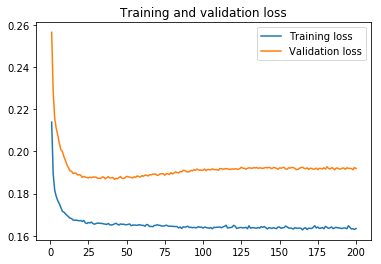

loss: 0.1653356837817801
val_loss: 0.1915552751223246
iterasi 59


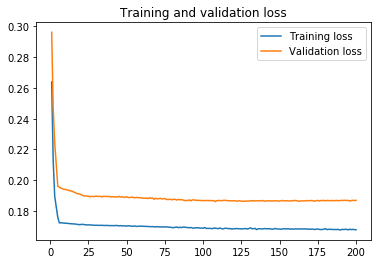

loss: 0.1701752720065123
val_loss: 0.18904021563008427
iterasi 60


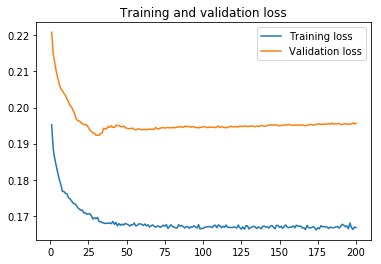

loss: 0.16833266608621295
val_loss: 0.19560913930336632
iterasi 61


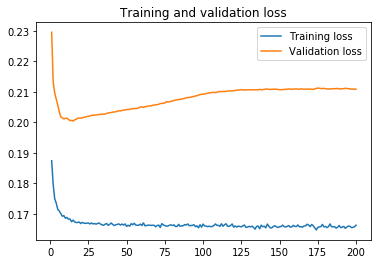

loss: 0.16661318580510567
val_loss: 0.2078676062139372
iterasi 62


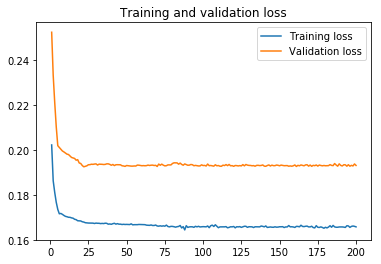

loss: 0.16705217730088584
val_loss: 0.19436635431833565
iterasi 63


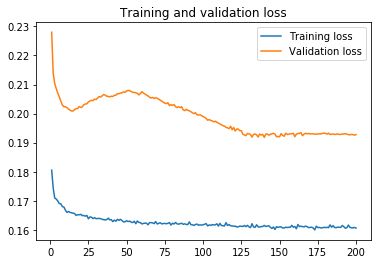

loss: 0.16248507455545755
val_loss: 0.19911062280026579
iterasi 64


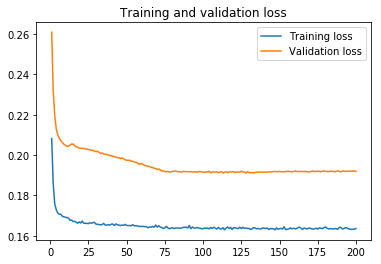

loss: 0.16493149202793603
val_loss: 0.19533385302871464
iterasi 65


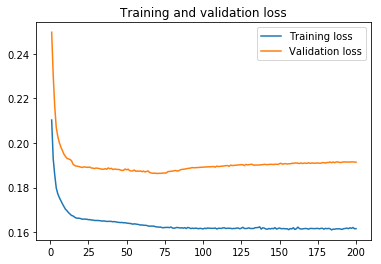

loss: 0.16358502850986958
val_loss: 0.19042028006476663
iterasi 66


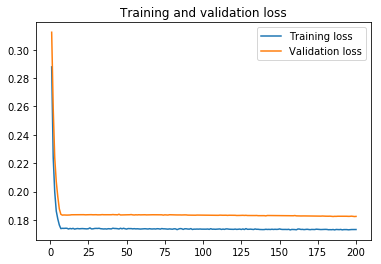

loss: 0.174637705818908
val_loss: 0.1847190556519975
iterasi 67


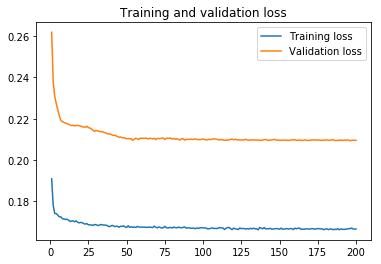

loss: 0.16764236404266278
val_loss: 0.2116014431541165
iterasi 68


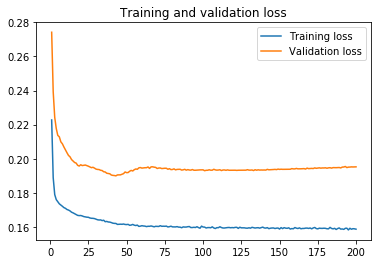

loss: 0.16164081033795838
val_loss: 0.1953544379460315
iterasi 69


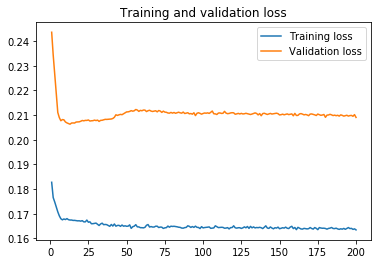

loss: 0.16511313201494843
val_loss: 0.21046974730677903
iterasi 70


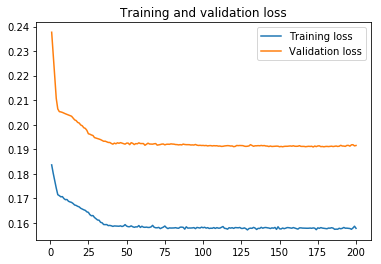

loss: 0.15962921891128035
val_loss: 0.19352725182039043
iterasi 71


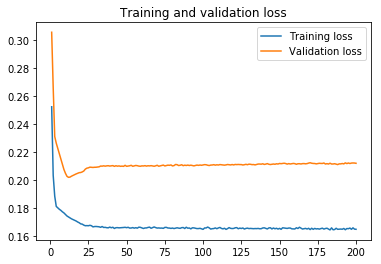

loss: 0.16728046455082557
val_loss: 0.21157822104170917
iterasi 72


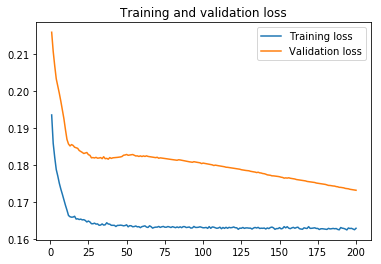

loss: 0.1641909376815856
val_loss: 0.1805856745565931
iterasi 73


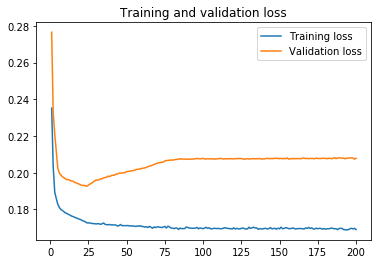

loss: 0.171429768210525
val_loss: 0.2051298585192611
iterasi 74


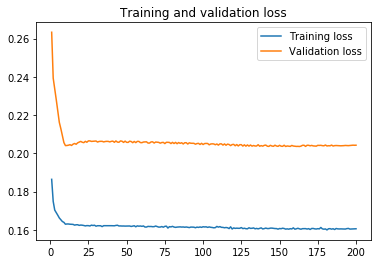

loss: 0.16167152552649028
val_loss: 0.20580333454223973
iterasi 75


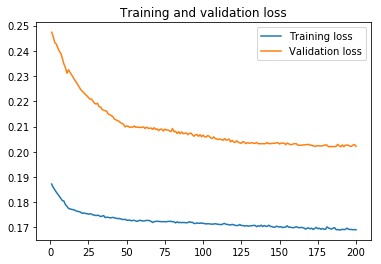

loss: 0.17233968154364326
val_loss: 0.2097239730786532
iterasi 76


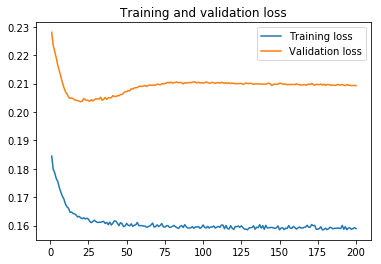

loss: 0.16073891755825703
val_loss: 0.20912705077789723
iterasi 77


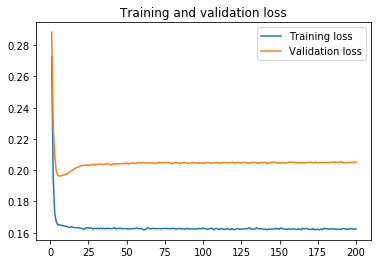

loss: 0.16336894912951608
val_loss: 0.2046973612407843
iterasi 78


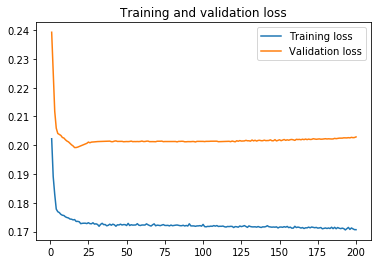

loss: 0.17240637713678514
val_loss: 0.2019194972018401
iterasi 79


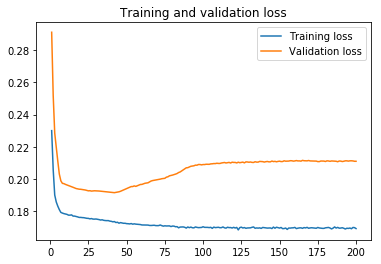

loss: 0.17178396777563557
val_loss: 0.20525635524342456
iterasi 80


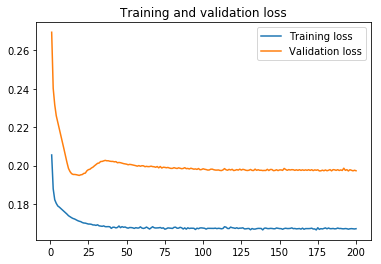

loss: 0.16853554897068687
val_loss: 0.19978835075472795
iterasi 81


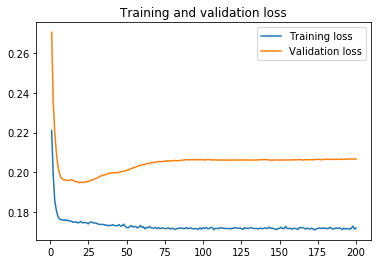

loss: 0.17286975255736953
val_loss: 0.20452664711512625
iterasi 82


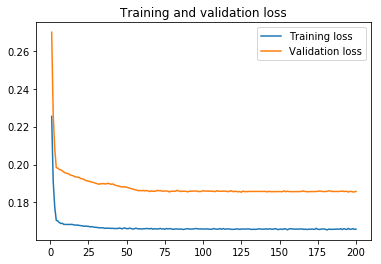

loss: 0.16681768025706858
val_loss: 0.18805268839622538
iterasi 83


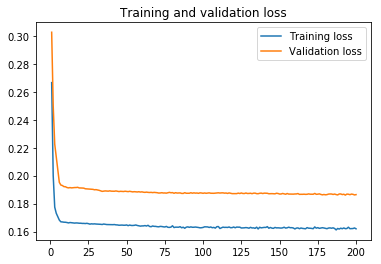

loss: 0.16441584524963607
val_loss: 0.18925797445699571
iterasi 84


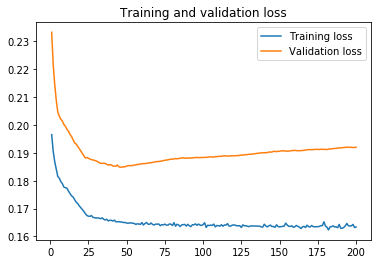

loss: 0.16575084922382943
val_loss: 0.19008913330423333
iterasi 85


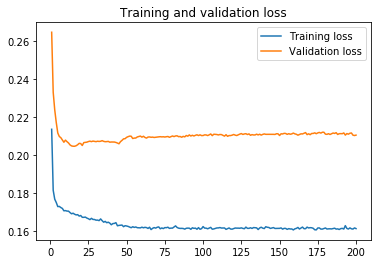

loss: 0.16316687215907458
val_loss: 0.21021329978791375
iterasi 86


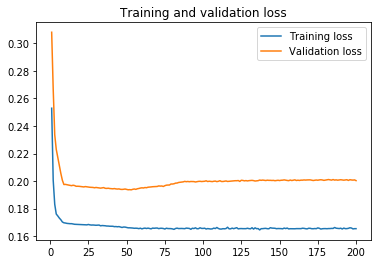

loss: 0.16695796594879644
val_loss: 0.19986778925172985
iterasi 87


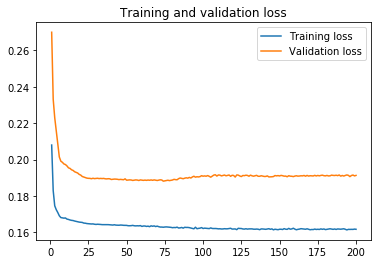

loss: 0.16341675262032537
val_loss: 0.19170308683378004
iterasi 88


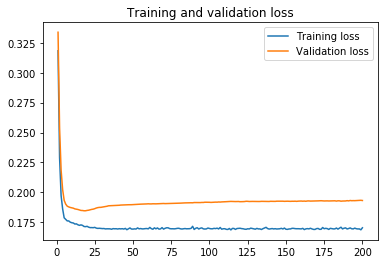

loss: 0.1711061009114934
val_loss: 0.19206775920776029
iterasi 89


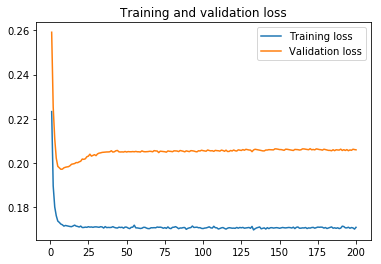

loss: 0.17121587608437547
val_loss: 0.20528555863847334
iterasi 90


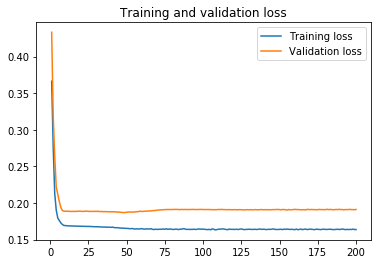

loss: 0.16702583271883642
val_loss: 0.19275444829215607
iterasi 91


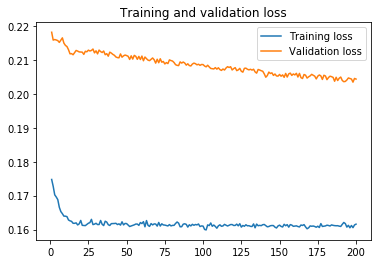

loss: 0.1616714571825868
val_loss: 0.2086320420820266
iterasi 92


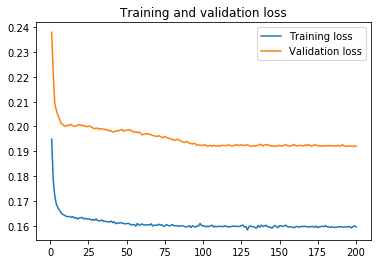

loss: 0.16083604813234845
val_loss: 0.19530055820941924
iterasi 93


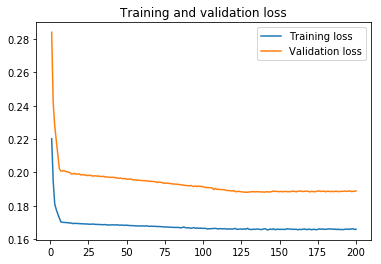

loss: 0.16760775570127887
val_loss: 0.19332622800953686
iterasi 94


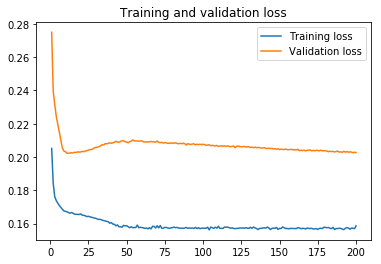

loss: 0.15926499016816403
val_loss: 0.2068849320989102
iterasi 95


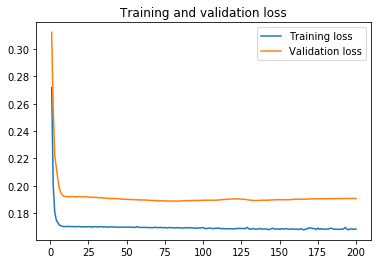

loss: 0.1698478252866716
val_loss: 0.19149509290854133
iterasi 96


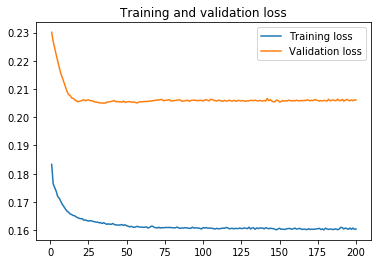

loss: 0.16178374669842868
val_loss: 0.20654994552644587
iterasi 97


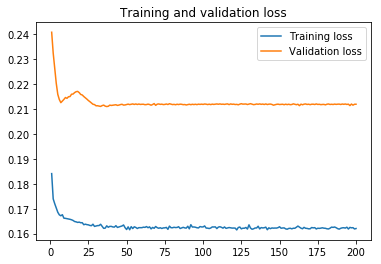

loss: 0.16296652740222592
val_loss: 0.21254694441022973
iterasi 98


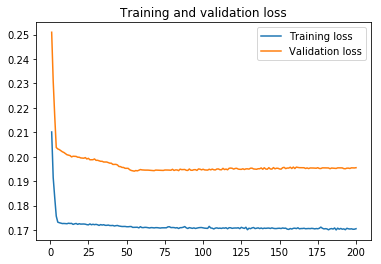

loss: 0.17145832176560988
val_loss: 0.19644745712168515
iterasi 99


In [9]:
yboot = pd.DataFrame()
for i in range(0, 100):
    X_samples, y_samples = resample(X_train, y_train)

    model2 = tnn.lstmModel(X_samples, y_samples, X_test, y_test, epochs=200, batch_size=8, 
                           units=4, drop=0.002, recdrop=0.002, plot=False)

    # make prediction
    ypred = model2.model.predict(X_test)
    # reshape X
    X = X_test.reshape((X_test.shape[0], X_test.shape[2]))
    # invert scaling predicted data
    inv_ypred = np.concatenate((X[:, :], ypred), axis=1)
    inv_ypred = scaler.inverse_transform(inv_ypred)
    inv_ypred = inv_ypred[:, -1]
    
    print('iterasi {0}'.format(i))
    
    yboot[i] = pd.Series(inv_ypred)

In [21]:
import scipy.stats as st

In [140]:
yboot.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,yhat,var,ytrue
0,1.942283,2.004562,1.011455,0.973504,2.025947,1.717222,1.957215,1.167291,1.025030,1.025180,...,2.005035,1.935769,1.688188,2.004684,0.942631,0.997249,1.371056,1.558514,1.120541e-31,3.0
1,2.477303,1.636914,1.386639,2.096331,1.421635,1.302899,1.572686,2.087850,1.755023,2.565573,...,1.528475,1.918671,1.122698,2.502702,1.927974,1.358419,2.146278,1.831252,2.868585e-31,0.0
2,1.942283,2.004562,1.011455,0.973504,2.025947,1.717222,1.957215,1.167291,1.025030,1.025180,...,2.005035,1.935769,1.688188,2.004684,0.942631,0.997249,1.371056,1.558514,1.120541e-31,3.0
3,2.471485,1.647724,1.306891,2.056355,1.479356,1.292742,1.568609,2.050361,1.633343,2.532880,...,1.522938,1.924148,1.066692,2.570778,1.895267,1.287248,2.126105,1.818577,5.099707e-31,2.0
4,1.998176,1.340932,1.172961,1.741073,0.954658,1.074953,1.267654,1.515667,1.082170,2.268513,...,1.246075,1.664437,0.999059,2.069361,1.621637,1.110188,1.924085,1.496778,6.454316e-31,1.0


In [37]:
yboot.loc[0,:].sum()/100

1.5585140001028777

In [39]:
# khosravi et al. halaman 6, formula (28)
yboot['yhat'] = yboot.sum(axis=1)/100

In [66]:
yboot.iloc[0, 100]

1.5585140001028777

In [83]:
# khosravi et al. halaman 6, formula (29)
listOfVar = []
for i in range(len(yboot)):
    variance = np.square((yboot.iloc[i, :-1] - yboot.iloc[i, 100]).sum())/(100-1)
    listOfVar.append(variance)

In [86]:
yboot['var'] = pd.Series(listOfVar)

In [109]:
# reshape X
X = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for actual data
y = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((X[:, :], y_test.reshape((-1, 1))), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]

In [110]:
yboot['ytrue'] = pd.Series(inv_y)

In [114]:
yboot.loc[0, 'yhat']

1.5585140001028777

In [147]:
# khosravi et al. halaman 6, formula (30)
listOfRes = []
for i in range(len(yboot)):
    temp = np.square(yboot.loc[i, 'ytrue'] - yboot.loc[i, 'yhat']) - yboot.loc[i, 'var']
    listOfRes.append(temp)
for i in range(len(listOfRes)):
    listOfRes[i] = np.max([listOfRes[i], 0])

In [149]:
yboot['res'] = pd.Series(listOfRes)

In [162]:
# 95% prediction intervals
# import scipy.stats as st
# st.norm.ppf(1-(0.05/2))
z = 1.96
err = z * np.sqrt(yboot['res'])
lower_confidence = yboot['yhat'] - err
upper_confidence = yboot['yhat'] + err

In [163]:
yboot['lowconf'] = lower_confidence
yboot['uppconf'] = upper_confidence

In [168]:
# seharusnya dilakukan seribu iterasi
yboot.head(15)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,yhat,var,ytrue,res,lowconf,uppconf
0,1.942283,2.004562,1.011455,0.973504,2.025947,1.717222,1.957215,1.167291,1.025030,1.025180,...,2.004684,0.942631,0.997249,1.371056,1.558514,1.120541e-31,3.0,2.077882,-1.266799,4.383827
1,2.477303,1.636914,1.386639,2.096331,1.421635,1.302899,1.572686,2.087850,1.755023,2.565573,...,2.502702,1.927974,1.358419,2.146278,1.831252,2.868585e-31,0.0,3.353485,-1.758002,5.420506
2,1.942283,2.004562,1.011455,0.973504,2.025947,1.717222,1.957215,1.167291,1.025030,1.025180,...,2.004684,0.942631,0.997249,1.371056,1.558514,1.120541e-31,3.0,2.077882,-1.266799,4.383827
3,2.471485,1.647724,1.306891,2.056355,1.479356,1.292742,1.568609,2.050361,1.633343,2.532880,...,2.570778,1.895267,1.287248,2.126105,1.818577,5.099707e-31,2.0,0.032914,1.462989,2.174166
4,1.998176,1.340932,1.172961,1.741073,0.954658,1.074953,1.267654,1.515667,1.082170,2.268513,...,2.069361,1.621637,1.110188,1.924085,1.496778,6.454316e-31,1.0,0.246788,0.523093,2.470462
5,1.526260,1.081075,0.987089,1.389521,0.505600,0.871673,0.997900,0.949467,0.417624,1.976246,...,1.649445,1.318174,0.886213,1.714373,1.174402,7.171463e-32,3.0,3.332808,-2.403770,4.752574
6,1.930553,2.116189,1.699785,2.167018,1.639735,1.915411,1.824614,1.528473,2.174703,2.335962,...,2.328486,1.991866,1.745421,2.244594,2.035658,1.561785e-30,1.0,1.072588,0.005768,4.065548
7,1.526260,1.081075,0.987089,1.389521,0.505600,0.871673,0.997900,0.949467,0.417624,1.976246,...,1.649445,1.318174,0.886213,1.714373,1.174402,7.171463e-32,2.0,0.681612,-0.443770,2.792574
8,1.998176,1.340932,1.172961,1.741073,0.954658,1.074953,1.267654,1.515667,1.082170,2.268513,...,2.069361,1.621637,1.110188,1.924085,1.496778,6.454316e-31,1.0,0.246788,0.523093,2.470462
9,1.556839,1.098012,0.797981,1.286739,0.731377,0.840325,1.006577,0.842349,0.088853,1.879413,...,1.870181,1.206650,0.700579,1.664791,1.145916,2.868585e-31,4.0,8.145795,-4.448088,6.739921


In [1]:
# referensi
# a comprehensive review of neural network-based prediction intervals and new advances
# https://stackoverflow.com/questions/41989866/i-created-a-class-to-return-a-confidence-interval-after-bootstrapping-but-my-co
# https://stackoverflow.com/questions/40491298/how-to-calculate-95-confidence-intervals-using-bootstrap-method?noredirect=1&lq=1
# https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python

In [169]:
yboot.to_csv('./csvfiles/ybootstrap.csv', index=False)

TensorShape([Dimension(3), Dimension(1), Dimension(383)])